In [42]:
import numpy as np # Imports the Numerical Python Library for Mathematics calculations
import pandas as pd # Imports the Pandas Library which allows us to manipulate Data files like .csv
import matplotlib.pyplot as plt # Imports the Matplotlib Library for Visualization

In [54]:
# Dataset References: https://www.kaggle.com/datasets/yashgpt/us-college-data, https://www.statlearning.com/resources-python
# Kaggle describes what the columns actually mean.

# Import data
college = pd.read_csv('/content/College.csv') # Returns a DataFrame object which has its own inherited methods such as .head, .shape, .columns, etc.
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [55]:
'''Two ways to do the same thing; We're just getting rid of column 0.
By changing index_col, you're effectively changing the first column you see. Normally it's set to "None" so it makes a column with rows labeled 0 to #(rows of data) = 776 in this case.
If I change it to 3 for instance, it'll take the column 'Apps' and replaces the 0-776 column with it instead. Then the other columns will shift down to fill the previous place of Apps.
college2 = pd.read_csv('/content/College.csv', index_col=0)'''

college3 = college.rename({'Unnamed: 0': 'College'}, axis=1) # Axis = 1 refers to columns while Axis = 0 refers to rows. Renames the first row of column headers only?
college3 = college3.set_index('College')
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [56]:
# References: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# Update the original college variable to a new dataframe
# Prof said .copy() is better for memory allocation reasons vs. What the question says which is set college = college3
college = college3.copy()
college.describe() # We're dealing with numerical data, so it returns a summary of count, mean, std, min, 25%, 50%, 75%, max

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Enroll', ylabel='Enroll'>,
        <Axes: xlabel='Accept', ylabel='Enroll'>,
        <Axes: xlabel='Top10perc', ylabel='Enroll'>],
       [<Axes: xlabel='Enroll', ylabel='Accept'>,
        <Axes: xlabel='Accept', ylabel='Accept'>,
        <Axes: xlabel='Top10perc', ylabel='Accept'>],
       [<Axes: xlabel='Enroll', ylabel='Top10perc'>,
        <Axes: xlabel='Accept', ylabel='Top10perc'>,
        <Axes: xlabel='Top10perc', ylabel='Top10perc'>]], dtype=object)

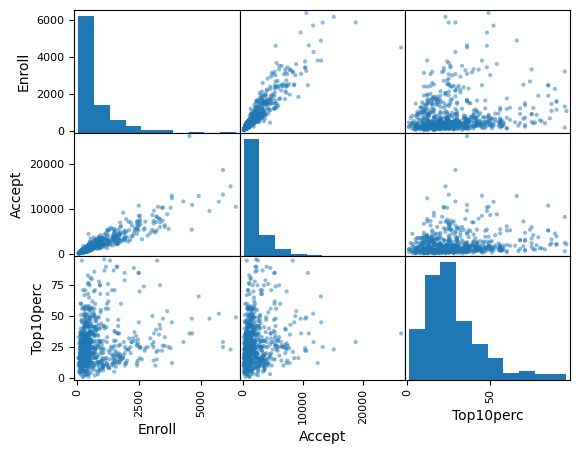

In [57]:
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html
df = college[['Enroll', 'Accept', 'Top10perc']] # We want the Columns from df college named Enroll, Accept, & Top10perc
pd.plotting.scatter_matrix(df)

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

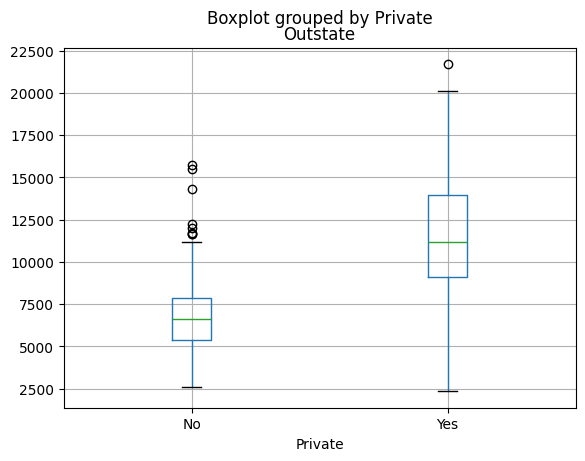

In [58]:
#Create side-by-side boxplots of Outstate vs. Private in dataframe college
#Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
college.boxplot(column=['Outstate'], by='Private')

In [59]:
# Changed it from [0,0.5,1] to [0,50,100] because the values for Top10perc are actually between 0 and 100.
# You'll see that the count is a lot greater on this interval if you change it to check.
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No', 'Yes']) #Cut Top10perc into two distinct intervals
college['Elite'].value_counts()

,count
Elite,
No,699
Yes,78


<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

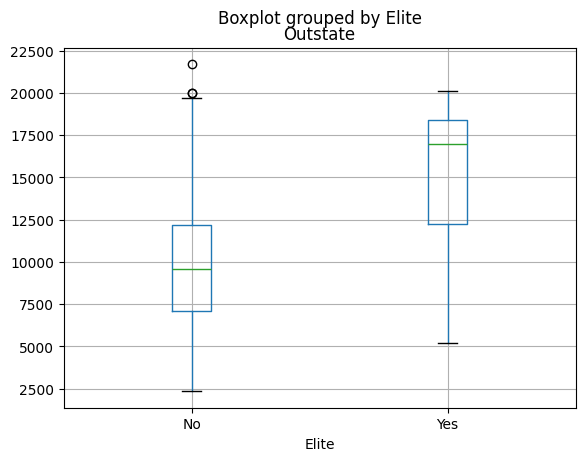

In [60]:
college.boxplot(column=['Outstate'], by='Elite')

In [84]:
# Part G
# Let's see how likely you are to receive a diploma if you attend a certain school
# The max for Grad.Rate according to .describe() is 118 so had to change 100 to 118.
college['Receive Diploma'] = pd.cut(college['Grad.Rate'], [0,25,50,75,118], labels=['Very Unlikely', 'Unlikely', 'Likely', 'Very Likely'])
college['Receive Diploma'].value_counts()

,count
Receive Diploma,
Likely,409
Very Likely,222
Unlikely,136
Very Unlikely,10


<ipython-input-85-59ab11e183ee>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  college.hist(column=['Grad.Rate'], by='Receive Diploma')


array([[<Axes: title={'center': 'Very Unlikely'}>,
        <Axes: title={'center': 'Unlikely'}>],
       [<Axes: title={'center': 'Likely'}>,
        <Axes: title={'center': 'Very Likely'}>]], dtype=object)

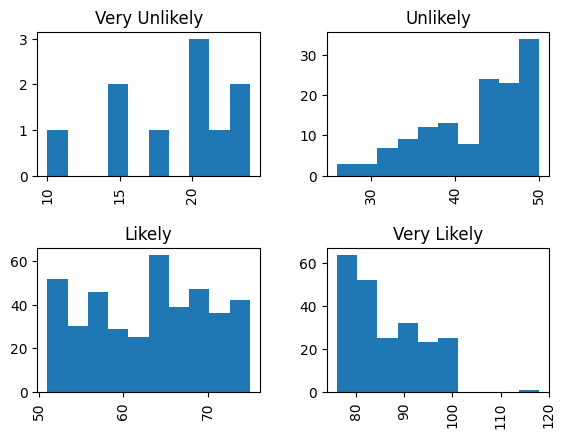

In [85]:
college.hist(column=['Grad.Rate'], by='Receive Diploma')

In [109]:
# Let's Judge Competitiveness; Not saying AcceptanceRate is all there is to defining a Tier1 school. It is Tier as in Tier 1 Competitiveness.
college['AcceptanceRate'] = college['Accept'] / college['Apps']
college['Competitive'] = pd.cut(college['AcceptanceRate'], [0, 0.25, 0.5, 0.75, 1], labels=['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'])
college['Competitive'].value_counts()

,count
Competitive,
Tier 4,446
Tier 3,273
Tier 2,54
Tier 1,4


<ipython-input-87-6e4f4d0381ab>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  college.hist(column=['AcceptanceRate'], by='Competitive')


array([[<Axes: title={'center': 'Tier 1'}>,
        <Axes: title={'center': 'Tier 2'}>],
       [<Axes: title={'center': 'Tier 3'}>,
        <Axes: title={'center': 'Tier 4'}>]], dtype=object)

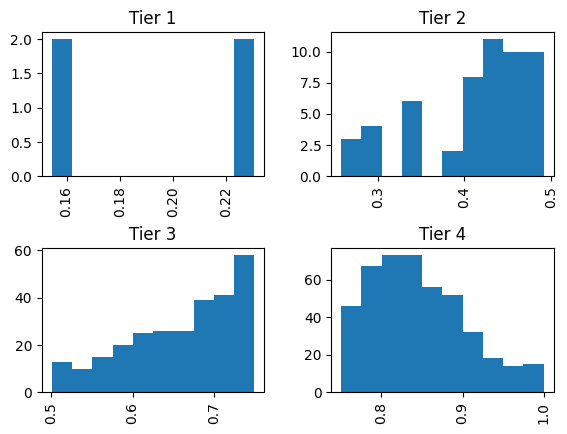

In [87]:
college.hist(column=['AcceptanceRate'], by='Competitive')

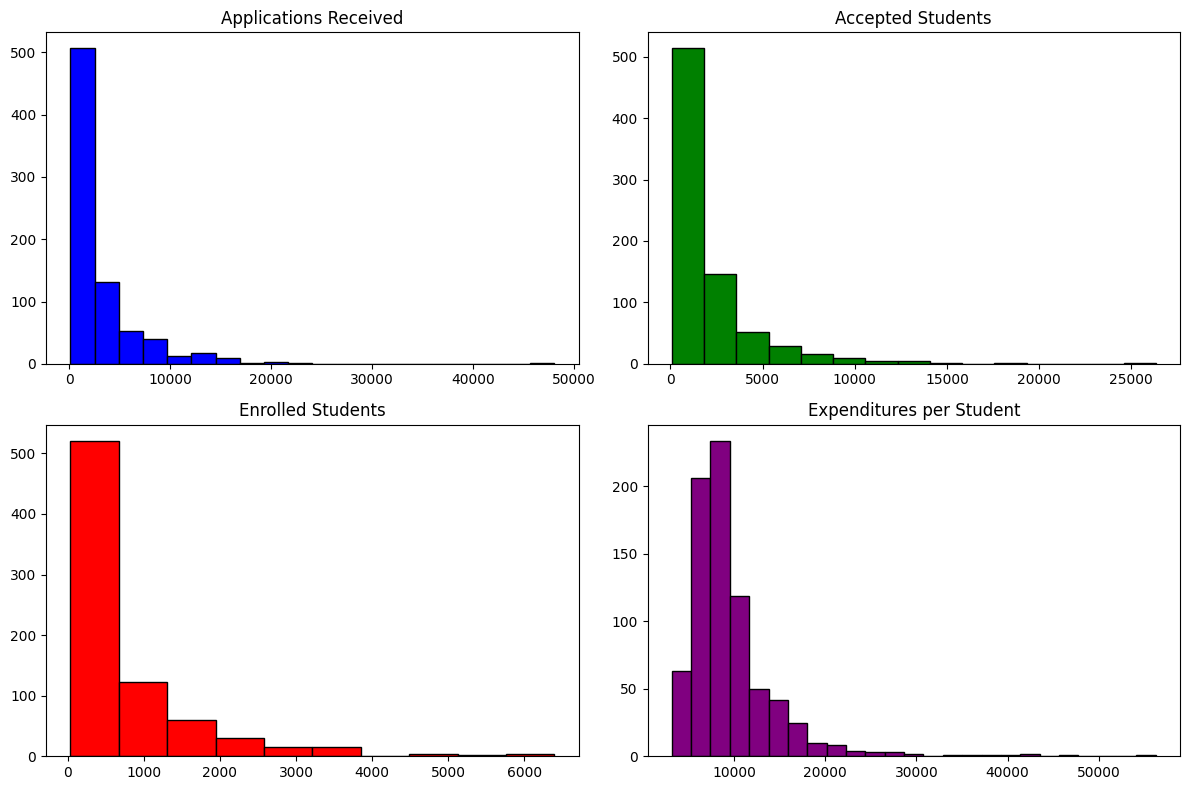

In [88]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Adjust figure size

# Create histograms with different bin counts; Higher bin count means more of those bars because smaller intervals.
axs[0, 0].hist(college['Apps'], bins=20, color='blue', edgecolor='black')
axs[0, 0].set_title("Applications Received")

axs[0, 1].hist(college['Accept'], bins=15, color='green', edgecolor='black')
axs[0, 1].set_title("Accepted Students")

axs[1, 0].hist(college['Enroll'], bins=10, color='red', edgecolor='black')
axs[1, 0].set_title("Enrolled Students")

axs[1, 1].hist(college['Expend'], bins=25, color='purple', edgecolor='black')
axs[1, 1].set_title("Expenditures per Student")

# Adjust layout for readability
plt.tight_layout() # Actually makes the plots more spaced out
plt.show()

In [102]:
# Part H: Continue exploring the data then provide a brief summary
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

# I wanted to see if there's a correlation between the likelihood of you graduating from a college and whether it's private or not.
pd.crosstab(college['Receive Diploma'], college['Private'], margins=True, margins_name='Total', normalize=True).round(2)

Private,No,Yes,Total
Receive Diploma,,,
Very Unlikely,0.00,0.01,0.01
Unlikely,0.09,0.08,0.18
Likely,0.15,0.38,0.53
Very Likely,0.03,0.26,0.29
Total,0.27,0.73,1.00


In [104]:
#This creates a Joint-Distribution Table by utilizing the normalize parameter of crosstab and rounding it to two decimal places
pd.crosstab(college['Receive Diploma'], college['Competitive'], margins=True, margins_name='Total', normalize=True).round(2)

Competitive,Tier 1,Tier 2,Tier 3,Tier 4,Total
Receive Diploma,,,,,
Very Unlikely,0.00,0.00,0.00,0.01,0.01
Unlikely,0.00,0.01,0.06,0.11,0.18
Likely,0.00,0.02,0.18,0.33,0.53
Very Likely,0.01,0.05,0.11,0.13,0.29
Total,0.01,0.07,0.35,0.57,1.00


In [105]:
# Can the proportion of Top10perc students a college gets tell us how Competitive they are?

#table = pd.crosstab(college['Competitive'], college['Elite'], margins=True, margins_name='Total', normalize=True)
#(table * 100).round(2).astype(str) + '%'

#Decided a Joint-Conditional Table is better to see the findings
pd.crosstab(college['Competitive'], college['Elite'], margins=True, margins_name='Total', normalize='index').round(2)

Elite,No,Yes
Competitive,,
Tier 1,0.00,1.00
Tier 2,0.43,0.57
Tier 3,0.89,0.11
Tier 4,0.97,0.03
Total,0.90,0.10


#Summary of findings from Part (H)


So first off, I wanted to see if there's a **correlation** between a schools graduation rate and it being a Private College. So I generated a Joint-Distribution Table using pd.crosstab (crosstab meaning crosstable) and made sure to check the margins parameter in order to show Totals as well as the normalize in order to keep values between 0 and 1. It showed that schools in the 50th percentile and up are overwhelmingly more private that non-private. $$P(\text{Private}|\text{Very Likely}) = \frac{0.26}{0.29} \approx 89.7\% \\ P(\text{Private}|\text{Likely}) = \frac{0.38}{0.53} \approx 71.7\% \\ P(\text{Private}|\text{Unlikely}) = \frac{0.08}{0.18} \approx 44.4\% \\ P(\text{Private}|\text{Very Unlikely}) = \frac{0.01}{0.01} \approx 100\%$$

As you can see, schools where the students are very likely to graduate have an 89.7% chance of being private, likely has 71.7%, unlikely has 44.4% chance, and very unlikely has 100% chance. So these values were dropping with the percentiles of Graduation Rate despite the majority of the data being from Private schools ($P(\text{Private}) = 72\%,\ P(\text{Private}^c) = 18\%$) until Very Unlikely where it is 100%. This is most likely because private makes up so much of the dataset, so we need more data that samples public universities just as much.

---
Next I wanted to see if there's some sort of relationship between Graduation Rate/Likelihood of Receiving a Diploma attending a school and how 'Competitive' it is. This Competitiveness is a discrete measure of their Acceptance Rate with Tier 1 (75th percentile and up) being the most competitive. While Tier 3 & 4 Competitive Schools were distributed throughout Very Unlikely - Very Likely, Tiers 1 & 2 were most concentrated in Likely & Very Likely. EX: $P(\text{Very Likely, Tier 2}) = 0.05$ while $P(\text{Tier 2}) = 0.07$; This is a big proportion of Tier 2 concentrated in Very Likely.

---
Elite was defined as the proportion of students who came from the Top 10% of their Highschool class. (0-50)% is not Elite and (50-100)% is Elite. Is there a correlation between this and competitiveness/acceptance rate? Normally you'd assume that the most competitive schools only accept the top applicants. I created a Joint-Conditional Table to see this. $$P(\text{Elite}|\text{Tier 1}) = 100\% \\ P(\text{Elite}|\text{Tier 2}) = 57\% \\ P(\text{Elite}|\text{Tier 3}) = 11\% \\ P(\text{Elite}|\text{Tier 4}) = 3\%$$

As we can see, as the tiers drop, 'Elite' students make up less of the student-body